# Nestor el papu de papus

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor as rf
from mpl_toolkits.mplot3d.axes3d import Axes3D
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
datah= pd.read_csv('highp_finalresults.csv')
datal= pd.read_csv('lowp_finalresults.csv')
datah['rplanet(i)/radtie'][26720]=datah['rplanet(i)/radtie'][26721]

In [6]:
len_h=len(datah['it'])
len_l=len(datal['it'])

In [7]:
numplan = np.array([])
masast = np.array([])
cont=1
masas = datah['emepla(i)/emet'][0]
k=0
for i in range(max(datah['ident'])+1):
    for j in range (len_h):
        k+=1
        if k==len_h:
            break
            
        if(int(datah['ident'][k]) != i):
            k-=1
            break
        cont+=1
        masas += datah['emepla(i)/emet'][k]
        
    numplan = np.append(numplan,cont)
    masast = np.append(masast,masas)
    cont = 0
    masas = 0


In [8]:
bignumpla = np.zeros(len_h)
bigmasas = np.zeros(len_h)
k = 0
for i in range(max(datah['ident'])+1):
    for j in range(int(numplan[i])):
        bignumpla[k] = numplan[i]
        bigmasas[k] = masast[i]
        k += 1

In [9]:
datah['numpla']=pd.Series(bignumpla,index = datah.index)
datah['masastot']=pd.Series(bigmasas,index = datah.index)
datah['efic']=pd.Series(datah['masastot']/datah['emed'],index = datah.index)


In [10]:
Y1 = datah['numpla']
Y2 = datah['masastot']
Y3 = datah['efic']
X = datah[['ident', 'it', 'a(i)', 'emegas(i)', 'emepla(i)/emet', 'rplanet(i)/radtie', 'emestar', 'rc', 'qest', 'sigmag_0', 'emed', 'emetal', 'taugas']]
X_train, X_test, Y1_train, Y1_test = train_test_split(X, Y1, random_state=1)
X_train, X_test, Y2_train, Y2_test = train_test_split(X, Y2, random_state=1)
X_train, X_test, Y3_train, Y3_test = train_test_split(X, Y3, random_state=1)

In [11]:
train_scaler = preprocessing.StandardScaler().fit(X_train)
test_scaler = preprocessing.StandardScaler().fit(X_test)
X_traine = train_scaler.transform(X_train)
X_teste = test_scaler.transform(X_test)

#### mirando los datos por encima encontramos 5 variables que no cambiaban en lo absluto de planeta en planeta, estas fueron eliminadas para una visualización más amena

In [12]:
print(np.mean(X_traine))
print(np.std(X_traine,axis=0))


1.12174181123e-16
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]


#####  verificamos media y desviación en 0 y 1 respectivamente

In [13]:
alphas = np.linspace(0.01, 1.3, 80)
coefs1 = np.array([])
temp = np.array([])
scores1 = []
scores_std1 = []
for i in range(np.size(alphas)):
    clf1 = linear_model.Lasso(alpha=alphas[i])
    clf1.fit(X_traine, Y1_train)
    this_scores = cross_val_score(clf1, X_teste, Y1_test, cv=5)
    scores1.append(np.mean(this_scores))
    scores_std1.append(np.std(this_scores))
    for j in range(np.size(clf1.coef_)):
        temp = np.append(temp, clf1.coef_[j])
    coefs1 = np.append(coefs1, temp)
    temp = np.array([])
std_err1 = np.array(scores_std1)/np.sqrt(5)

In [14]:
alphas2 = np.linspace(0.01, 300,80)
coefs2 = np.array([])
temp = np.array([])
scores2 = []
scores_std2 = []
for i in range(np.size(alphas2)):
    clf2 = linear_model.Lasso(alpha=alphas2[i])
    clf2.fit(X_traine, Y2_train)
    this_scores = cross_val_score(clf2, X_teste, Y2_test, cv=5)
    scores2.append(np.mean(this_scores))
    scores_std2.append(np.std(this_scores))
    for j in range(np.size(clf2.coef_)):
        temp = np.append(temp, clf2.coef_[j])
    coefs2 = np.append(coefs2, temp)
    temp = np.array([])
    
std_err2 = np.array(scores_std1)/np.sqrt(5)

In [15]:
alphas3 = np.linspace(0.01, 5000,500)
coefs3 = np.array([])
temp = np.array([])
scores3 = []
scores_std3 = []
for i in range(np.size(alphas3)):
    clf3 = linear_model.Lasso(alpha=alphas3[i])
    clf3.fit(X_traine, Y3_train)
    this_scores = cross_val_score(clf3, X_teste, Y3_test, cv=5)
    scores3.append(np.mean(this_scores))
    scores_std3.append(np.std(this_scores))
    for j in range(np.size(clf3.coef_)):
        temp = np.append(temp, clf3.coef_[j])
    coefs3 = np.append(coefs3, temp)
    temp = np.array([])
    
std_err3 = np.array(scores_std3)/np.sqrt(5)

<function matplotlib.pyplot.xlabel>

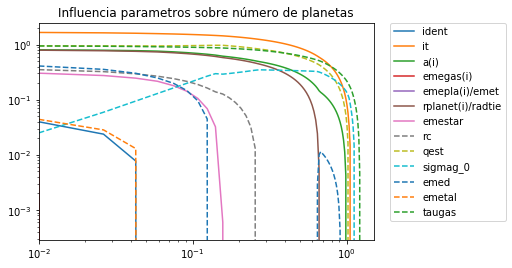

In [16]:
#numero de planetas
coefs1 = coefs1.reshape(len(alphas), 13)
nombres = ['ident', 'it', 'a(i)', 'emegas(i)', 'emepla(i)/emet', 'rplanet(i)/radtie', 'emestar', 'rc', 'qest', 'sigmag_0', 'emed', 'emetal', 'taugas']
for i in range(0,np.size(coefs1[0])):
    if(i<7):
        plt.plot(alphas, abs(coefs1[:,i]),label=nombres[i])
        plt.xscale('log')
        plt.yscale('log')
        plt.xlim(0,1.5)
    else:
        plt.plot(alphas, abs(coefs1[:,i]),label=nombres[i],ls='--')
        plt.xscale('log')
        plt.yscale('log')
        plt.xlim(0,1.5)
        
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Influencia parametros sobre número de planetas")
plt.xlabel




Segun la clasificación realizada con lasso los parametros que convergen al final a cero son los que mayor importancia tienen, los encontrados fueron en orden de importancia:
- gas dissipation timescale (yr)
- maximum dust surface density (g/cm^3) 	
- iteration index
- Toomre Q at min radius
- planet semi-major axis (AU)
- disk mass (M_sun)
- planet solid radius
- disk outer cutoff radius (AU)
- stellar mass (g)
- metallicity wrt solar
- unique system identifier



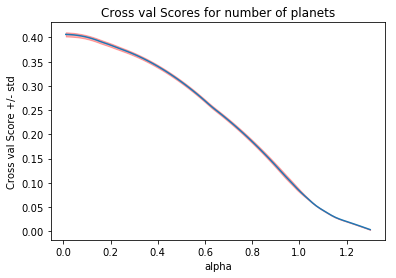

In [17]:
plt.plot(alphas,scores1)
plt.fill_between(alphas, scores1 + std_err1, scores1 - std_err1, alpha=0.3, color='red')
plt.ylabel('Cross val Score +/- std')
plt.xlabel('alpha')
plt.title('Cross val Scores for number of planets')

Se realizó un cross validation con con los valores que arroja Lasso para cada alpha, los valores de R no son geniales pero fue lo mejor que logramos. 

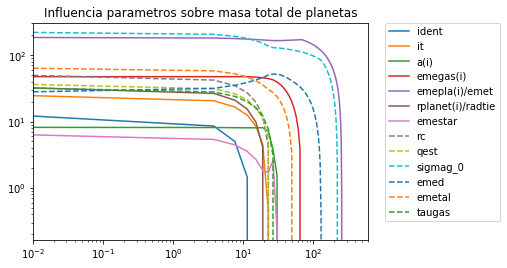

In [18]:
#Masas
coefs2 = coefs2.reshape(len(alphas2), 13)
nombres = ['ident', 'it', 'a(i)', 'emegas(i)', 'emepla(i)/emet', 'rplanet(i)/radtie', 'emestar', 'rc', 'qest', 'sigmag_0', 'emed', 'emetal', 'taugas']
for i in range(0,np.size(coefs2[0])):
    if(i<7):
        plt.plot(alphas2, abs(coefs2[:,i]),label=nombres[i])
        plt.xscale('log')
        plt.yscale('log')

    else:
        plt.plot(alphas2, abs(coefs2[:,i]),label=nombres[i],ls='--')
        plt.xscale('log')
        plt.yscale('log')

plt.xlim(0,600)        
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Influencia parametros sobre masa total de planetas")

Segun la clasificación realizada con lasso los parametros que convergen al final a cero son los que mayor importancia tienen, los encontrados fueron en orden de importancia:
- planet solid mass (M_earth) 
- maximum dust surface density (g/cm^3)
- disk mass (M_sun)
- planet gas mass (M_earth)
- metallicity wrt solar
- planet semi-major axis (AU)
- stellar mass (g)
- gas dissipation timescale (yr)
- Toomre Q at min radius
- iteration index
- disk outer cutoff radius (AU)
- planet solid radius
- unique system identifier


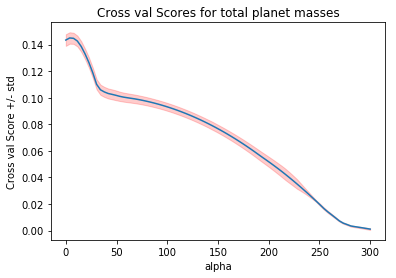

In [19]:
plt.plot(alphas2,scores2)
plt.fill_between(alphas2, scores2 + std_err2, scores2 - std_err2, alpha=0.2, color = 'red')
plt.ylabel('Cross val Score +/- std')
plt.xlabel('alpha')

plt.title('Cross val Scores for total planet masses')

Se realizó un cross validation con con los valores que arroja Lasso para cada alpha. En esta validación los valores de R 
bastante malos. 

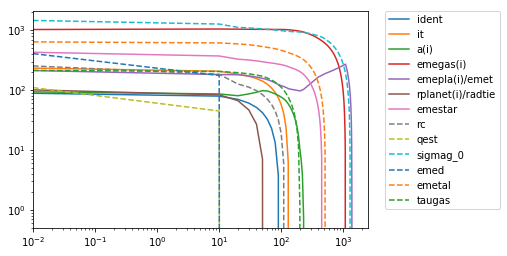

In [20]:
coefs3 = coefs3.reshape(len(alphas3), 13)
nombres = ['ident', 'it', 'a(i)', 'emegas(i)', 'emepla(i)/emet', 'rplanet(i)/radtie', 'emestar', 'rc', 'qest', 'sigmag_0', 'emed', 'emetal', 'taugas']
for i in range(0,np.size(coefs3[0])):
    if(i<7):
        plt.plot(alphas3, abs(coefs3[:,i]),label=nombres[i])
        plt.xscale('log')
        plt.yscale('log')

    else:
        plt.plot(alphas3, abs(coefs3[:,i]),label=nombres[i],ls='--')
        plt.xscale('log')
        plt.yscale('log')

    plt.xlim(0,2500)  
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

gun la clasificación realizada con lasso los parametros que convergen al final a cero son los que mayor importancia tienen.

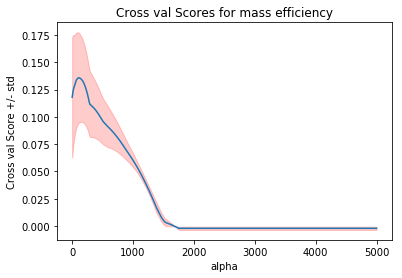

In [21]:
plt.plot(alphas3,scores3)
plt.fill_between(alphas3, scores3 + std_err3, scores3 - std_err3, alpha=0.2, color = 'red')
plt.ylabel('Cross val Score +/- std')
plt.xlabel('alpha')

plt.title('Cross val Scores for mass efficiency')

In [94]:
X_new, X_val, Y1_new, Y1_val = train_test_split(X, Y1, test_size=0.2)
X_train, X_test, Y1_train, Y1_test = train_test_split(X, Y1, test_size=0.2)

In [95]:
trees = [5,8,11,14,17,20,23,26]
depths = [5,8,11,14,17,20,23,26]
best_score = 0
best_d = 0
best_t = 0
scores = []
for i in trees:
        
    for j in depths:
        
        rf = RandomForestRegressor(n_estimators = i, max_depth = j)
        rf.fit(X_train, Y1_train)
        score = rf.score(X_test, Y1_test)
        scores.append(score)
        if(score > best_score):
            
            best_score = score
            best_d = j
            best_t = i
        
        
        
print (best_score, best_d, best_t)


0.998332922179 20 26


64


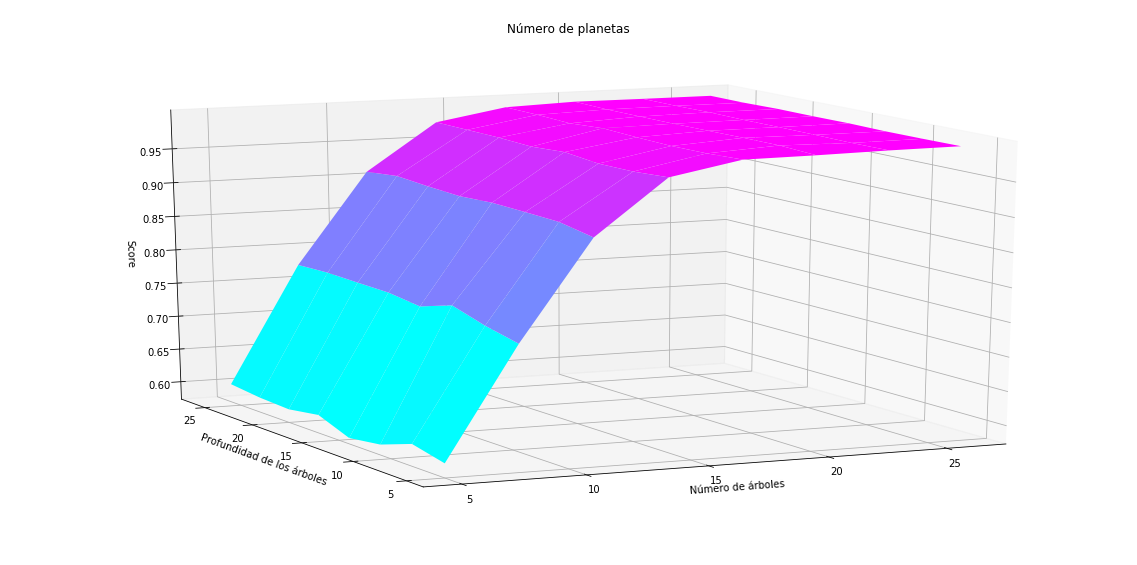

In [96]:
xg, yg = meshgrid(trees,depths)
scores = reshape(scores,[len(trees),len(depths)])
fig=figure(figsize=(20,10))
ax=fig.gca(projection='3d')
print(size(xg))
ax.view_init(15, -115)
mapa = "cool"
surf = ax.plot_surface(xg, yg, scores, rstride=1, cstride=1, cmap=mapa,linewidth=0, antialiased=True)
#ax.set_zlim(-3.0, 3.0)
#ax.set_xlim(-20, 20)
#ax.set_ylim(-20, 20)
title("Número de planetas\n")
ax.set_xlabel("Número de árboles")
ax.set_ylabel("Profundidad de los árboles")
ax.set_zlabel("Score")

In [98]:
rf = RandomForestRegressor(n_estimators = best_t, max_depth = best_d)
rf.fit(X_train, Y1_train)
score = rf.score(X_val, Y1_val)
score

0.99891257981407922

Se realizó un cross validation con con los valores que arroja Lasso para cada alpha. En esta validación para la eficiencia de masa los valores de R son terribles. 